# 03) EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns


%matplotlib inline
pd.set_option('display.max_columns', None)

In [84]:
#Importing clean data
df = pd.read_csv('../data/clean/041324_taxi_recs.csv')

#Setting the req_index column as the index
df.set_index('req_index', inplace=True)

#Converting the index to datetime
df.index = pd.to_datetime(df.index, format= '%Y-%m-%d')

df.head()

,trip_miles,tips,congestion_surcharge,temp,preciptype,zone,borough_name,trip_duration,month,day_of_month,driver_made,day_of_week,hour,minute
req_index,,,,,,,,,,,,,,
2022-01-04,7.050,7.91,0.00,27.6,0,West Farms/Bronx River,Bronx,25.0,1,4,33.30,Tuesday,7,32
2022-01-04,2.470,0.00,0.00,27.6,0,South Ozone Park,Queens,11.0,1,4,8.33,Tuesday,7,24
2022-01-04,5.310,0.00,2.75,27.6,0,Steinway,Queens,23.0,1,4,18.08,Tuesday,7,24
2022-01-04,3.670,0.00,0.00,27.6,0,Starrett City,Brooklyn,19.0,1,4,17.34,Tuesday,7,24
2022-01-04,2.853,0.00,2.75,27.6,0,Yorkville West,Manhattan,8.0,1,4,7.57,Tuesday,7,24


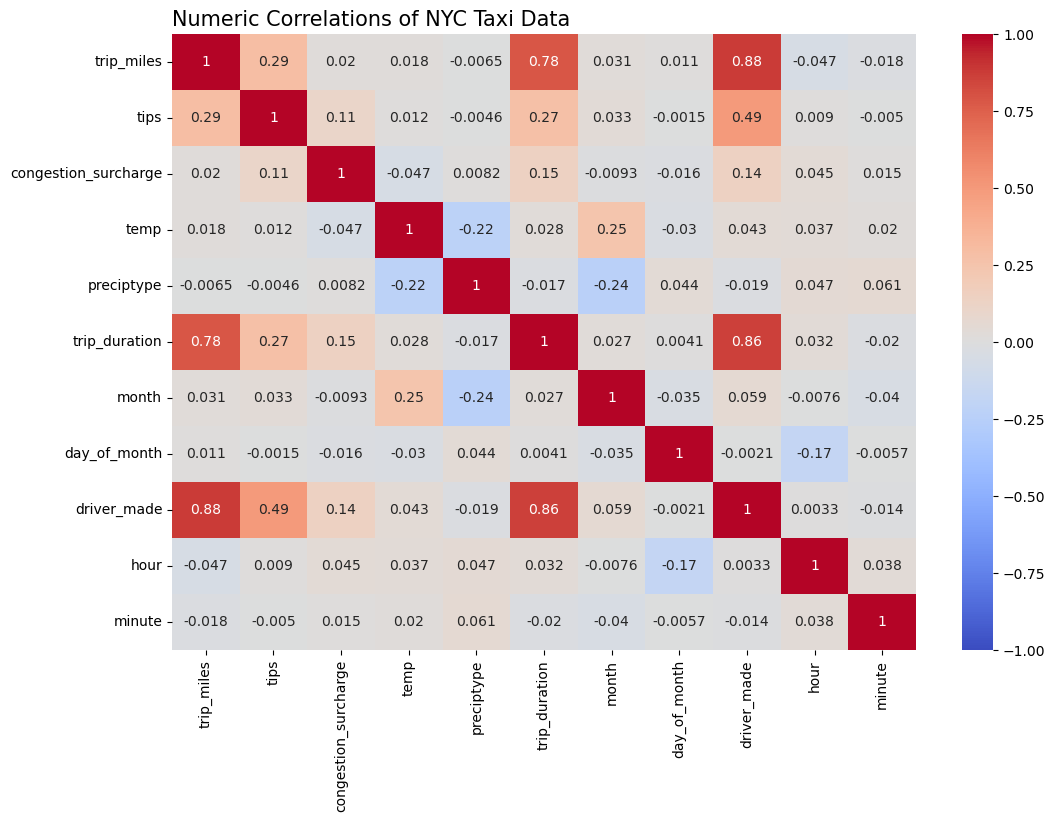

In [5]:
#Checking numeric correlations

#creating a corr variable to plot
corr = df.corr(numeric_only=True)

#Creating figure size
plt.figure(figsize=(12,8))

#Plotting a heatmap
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, cmap='coolwarm');

#Labeling
plt.title('Numeric Correlations of NYC Taxi Data', loc='left', fontsize=15);

## Exploring the data through time

In [6]:
#Creating a df by week
df_weekly = df['driver_made'].resample('W').mean()
by_week = pd.DataFrame(df_weekly)

#by_day
by_day = df['driver_made'].resample("D").mean()
by_day = pd.DataFrame(by_day)

#by_month
by_month = df['driver_made'].resample("ME").mean()
by_month = pd.DataFrame(by_month)

In [51]:
by_day.head()

,driver_made
req_index,
2022-01-04,16.947475
2022-01-05,NaN
2022-01-06,16.562685
2022-01-07,NaN
2022-01-08,15.202156


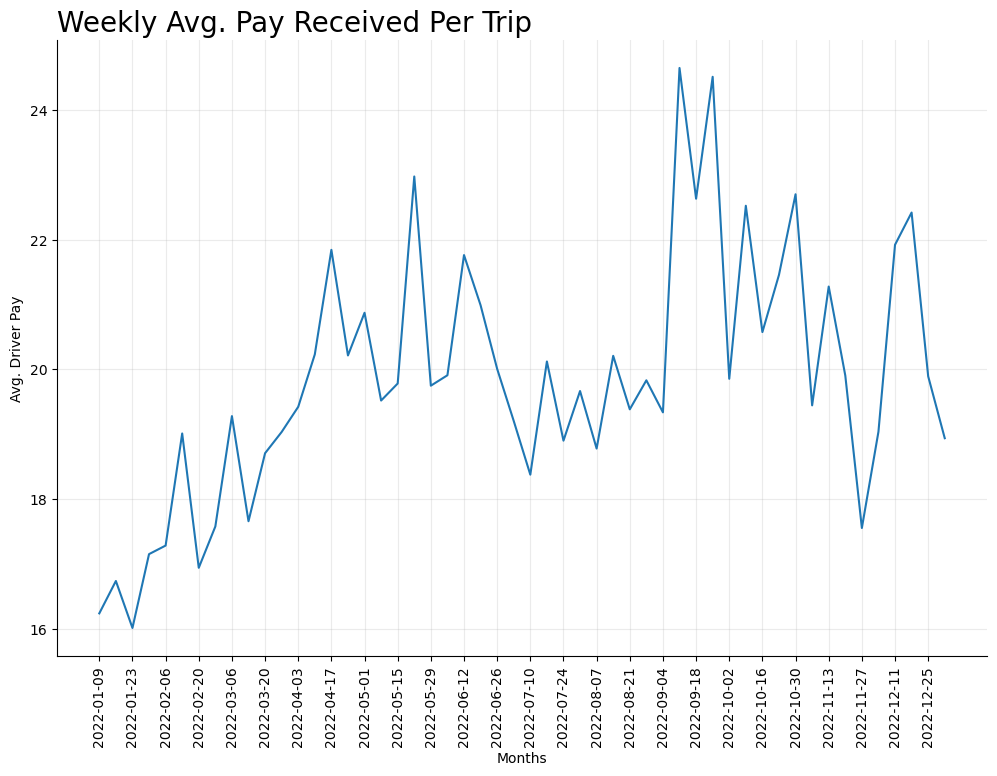

In [7]:
# Looking at weekly average driver pay per trip

#Setting figure size
plt.figure(figsize=(12,8))

#Plotting the graph
plt.plot(df.resample('W')['driver_made'].mean().dropna());

#Labeling
plt.ylabel("Avg. Driver Pay")
plt.xlabel("Months")
plt.title("Weekly Avg. Pay Received Per Trip", loc='left', fontsize=20);

#Formatting
plt.grid(True, alpha=.25)
sns.despine(right=True, top=True)
plt.xticks(df_weekly.index[::2], rotation=90);

/var/folders/1m/70vlnx9n73v__kwg38x_j79h0000gn/T/ipykernel_32832/836823151.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(df.resample('M')['driver_made'].mean().dropna(), color='orange', label='Monthly Avg.');
/var/folders/1m/70vlnx9n73v__kwg38x_j79h0000gn/T/ipykernel_32832/836823151.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(df.resample('2M')['driver_made'].mean().dropna(), color='red', label='Bi-monthly Avg.');


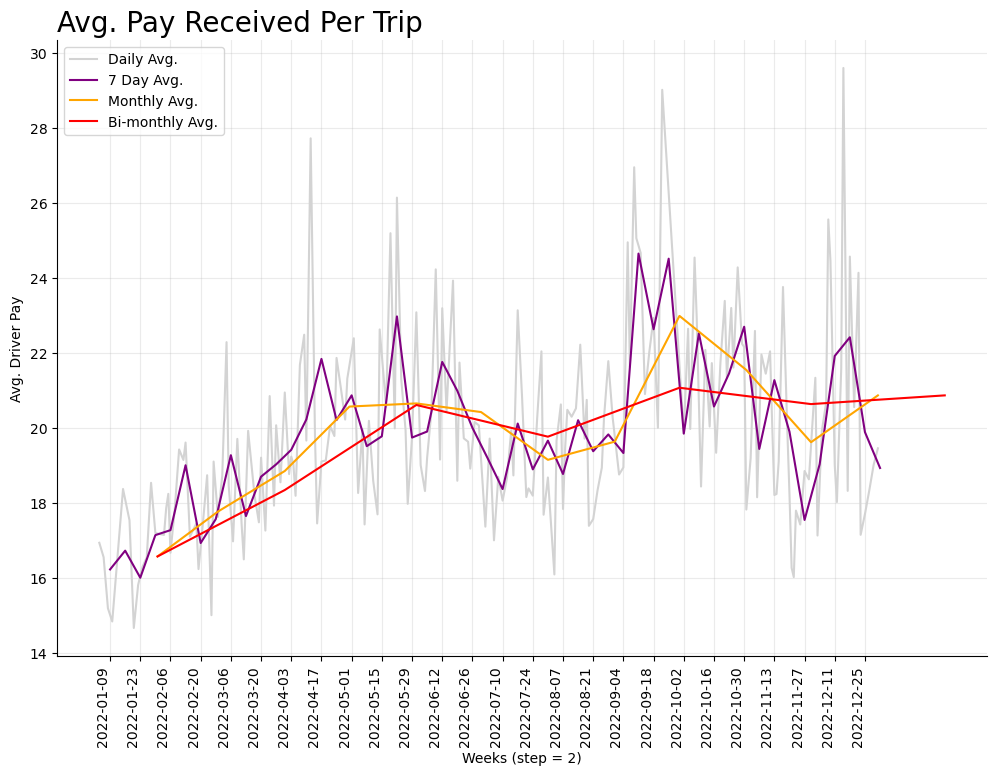

In [234]:
# Looking at weekly, monthly, and bi-monthly avg. pay per trip

#Setting figure size
plt.figure(figsize=(12,8))

#Plotting the graph
plt.plot(df.resample('D')['driver_made'].mean().dropna(), color='lightgray', label='Daily Avg.');
plt.plot(df.resample('W')['driver_made'].mean().dropna(), color='purple', label='7 Day Avg.');
plt.plot(df.resample('M')['driver_made'].mean().dropna(), color='orange', label='Monthly Avg.');
plt.plot(df.resample('2M')['driver_made'].mean().dropna(), color='red', label='Bi-monthly Avg.');

#Labeling
plt.ylabel("Avg. Driver Pay")
plt.xlabel("Weeks (step = 2)")
plt.title("Avg. Pay Received Per Trip", loc='left', fontsize=20);

#Formatting
plt.grid(True, alpha=.25)
sns.despine(right=True, top=True)
plt.xticks(df_weekly.index[::2], rotation=90, ha='right');
plt.legend();

#plt.savefig('../images/avg_pay_per_trip.png')

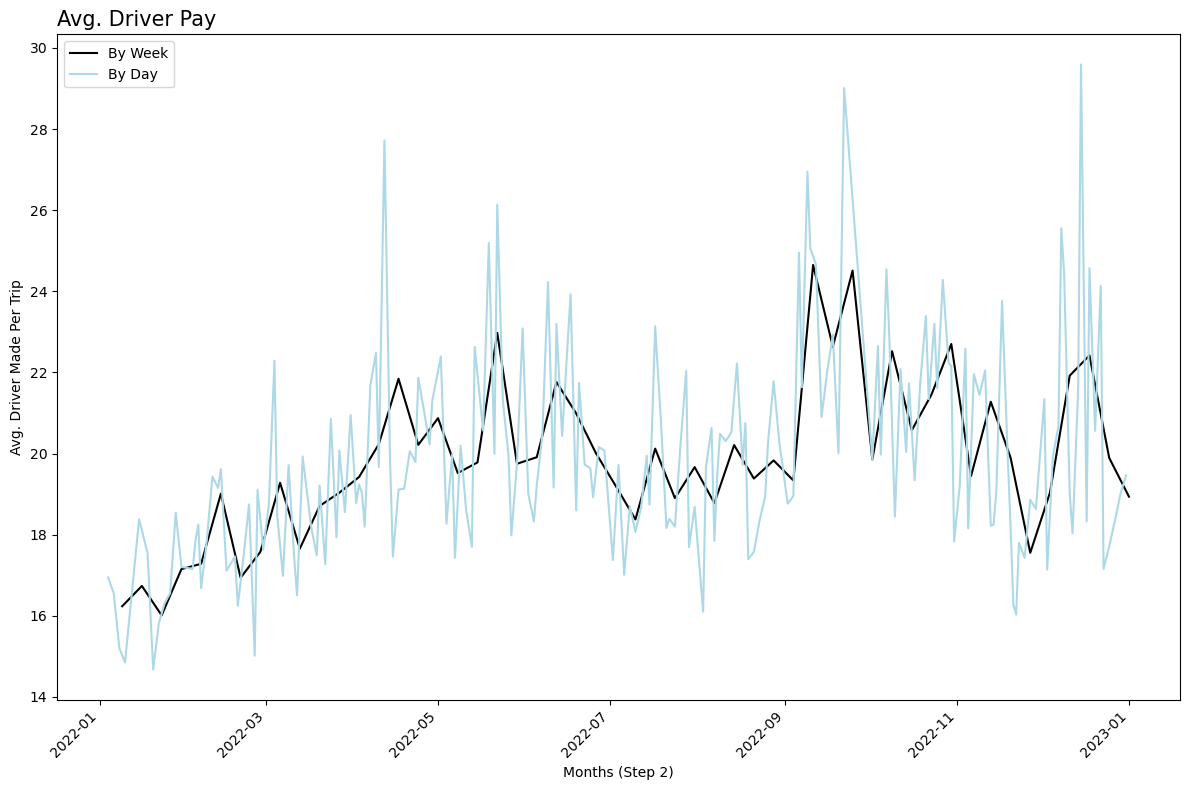

In [9]:
#Setting figure size
plt.figure(figsize=(12,8))

#Plotting the graph
plt.plot(by_week['driver_made'].dropna(), color='black', label="By Week")
plt.plot(by_day['driver_made'].dropna(), color='lightblue', label="By Day")

#Labeling
plt.ylabel("Avg. Driver Made Per Trip")
plt.xlabel("Months (Step 2)")
plt.title("Avg. Driver Pay", loc='left', fontsize=15);
plt.legend()

#Formatting
plt.xticks(rotation=45, ha='right')
plt.tight_layout(); 

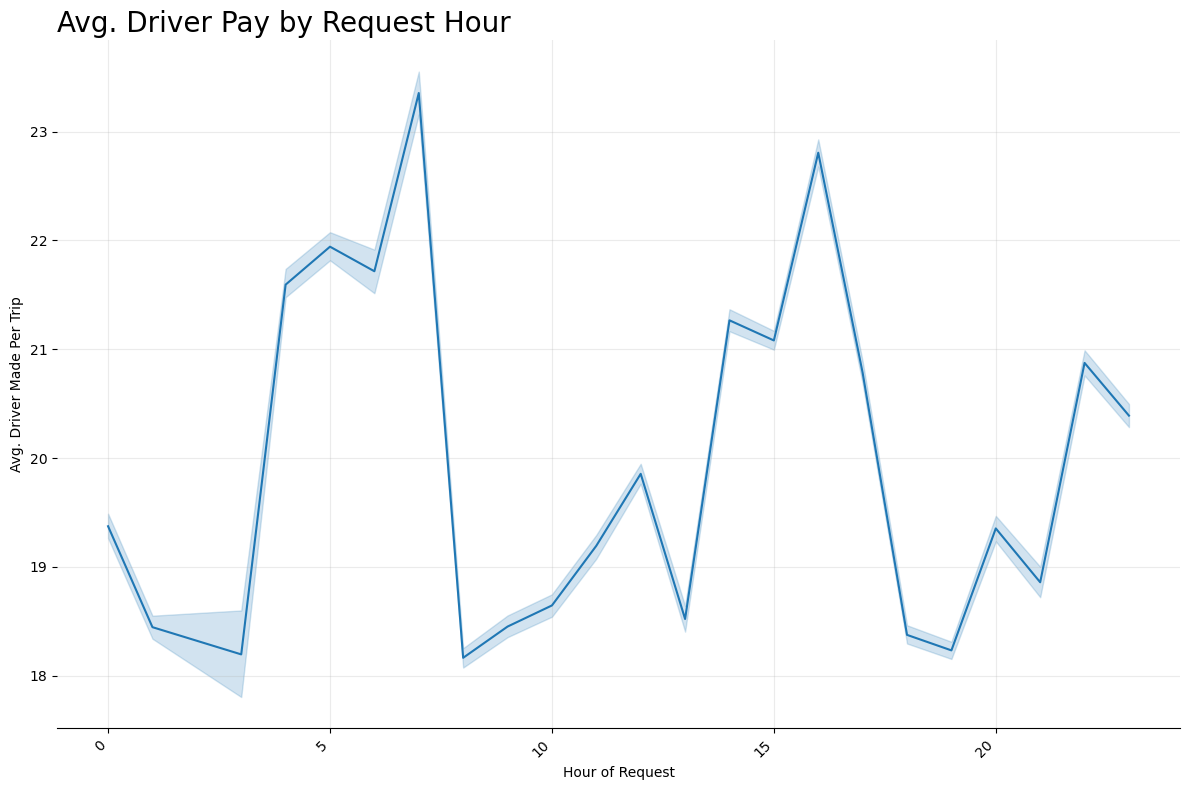

In [93]:
#Avg. Driver Pay by Request Hour

#Setting figure size
plt.figure(figsize=(12,8))

#Plotting the graph
sns.lineplot(x=df['hour'], y=df['driver_made'])

#Labeling
plt.ylabel("Avg. Driver Made Per Trip")
plt.xlabel("Hour of Request")
plt.title("Avg. Driver Pay by Request Hour", loc='left', fontsize=20);

#Formatting
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=.25)
sns.despine(top=True, left=True)
plt.tight_layout(); 

#plt.savefig('../images/avg_pay_trip_hour.png')

/var/folders/1m/70vlnx9n73v__kwg38x_j79h0000gn/T/ipykernel_32832/1409883659.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['day_of_month'].unique(), y=avg_trip_day, palette='Spectral');


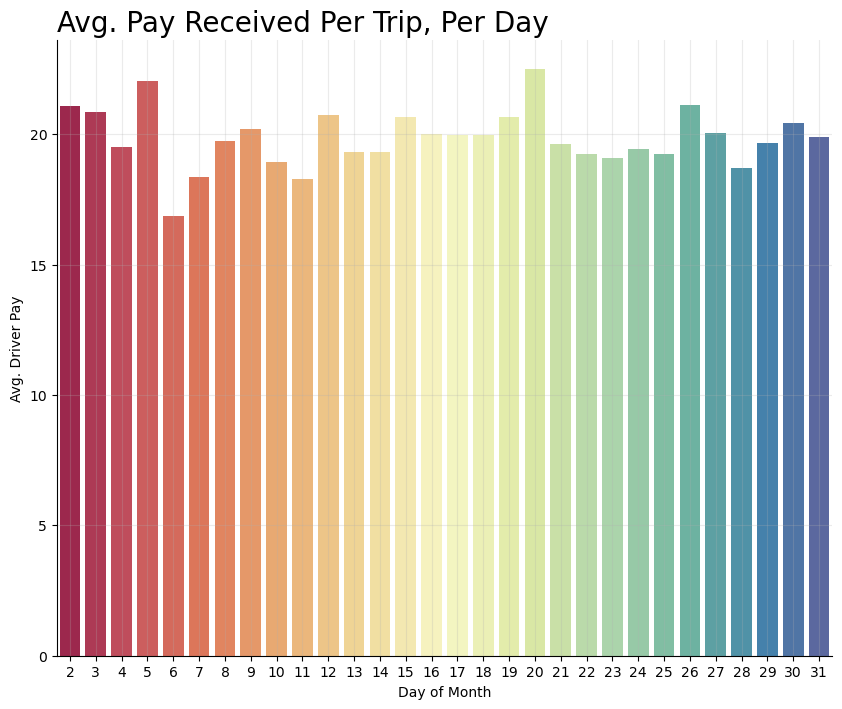

In [94]:
#Avg. Pay Per Trip by Day of Month

#Grouping avg. trip pay by day
avg_trip_day = df['driver_made'].groupby(df['day_of_month']).mean()

#Creating figure size
plt.figure(figsize=(10,8))

#Defining color
sns.color_palette("Spectral", as_cmap=True)

#Plotting
sns.barplot(x=df['day_of_month'].unique(), y=avg_trip_day, palette='Spectral');

#Labeling
plt.ylabel("Avg. Driver Pay")
plt.xlabel("Day of Month")
plt.title("Avg. Pay Received Per Trip, Per Day", loc='left', fontsize=20);

#Formatting
plt.grid(True, alpha=.25)
sns.despine(right=True, top=True);

#plt.savefig('../images/avg_pay_per_trip_day_of_month.png');

## Spend by Borough

/var/folders/1m/70vlnx9n73v__kwg38x_j79h0000gn/T/ipykernel_32832/2040729907.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(most_spend, palette='Spectral');


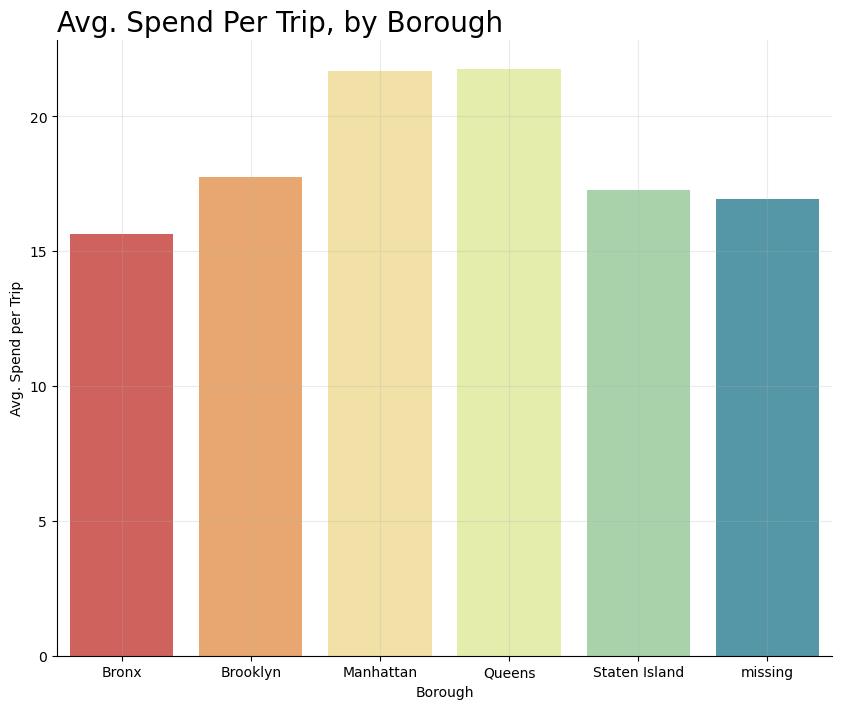

In [95]:
# Which NYC borough, on average, do people spend the most per trip?

#Grouping by average pay by borough
most_spend = df['driver_made'].groupby(df['borough_name']).mean()

#Creating figure size and setting color palette
plt.figure(figsize=(10, 8))
sns.color_palette("Spectral", as_cmap=True)

#Plotting a bar graph
sns.barplot(most_spend, palette='Spectral');

#Labeling
plt.ylabel("Avg. Spend per Trip")
plt.xlabel("Borough")
plt.title("Avg. Spend Per Trip, by Borough", loc='left', fontsize=20);

#Formatting
plt.grid(True, alpha=.25)
sns.despine(right=True, top=True);

#plt.savefig('../images/avg_trip_pay_by_burough.png');

In [21]:
#Making a missing borough df
missing = df[df['borough_name'] == 'missing']
missing = pd.DataFrame(missing)

#Getting rid of the 400 missing borough
df = df[df['borough_name'] != 'missing']

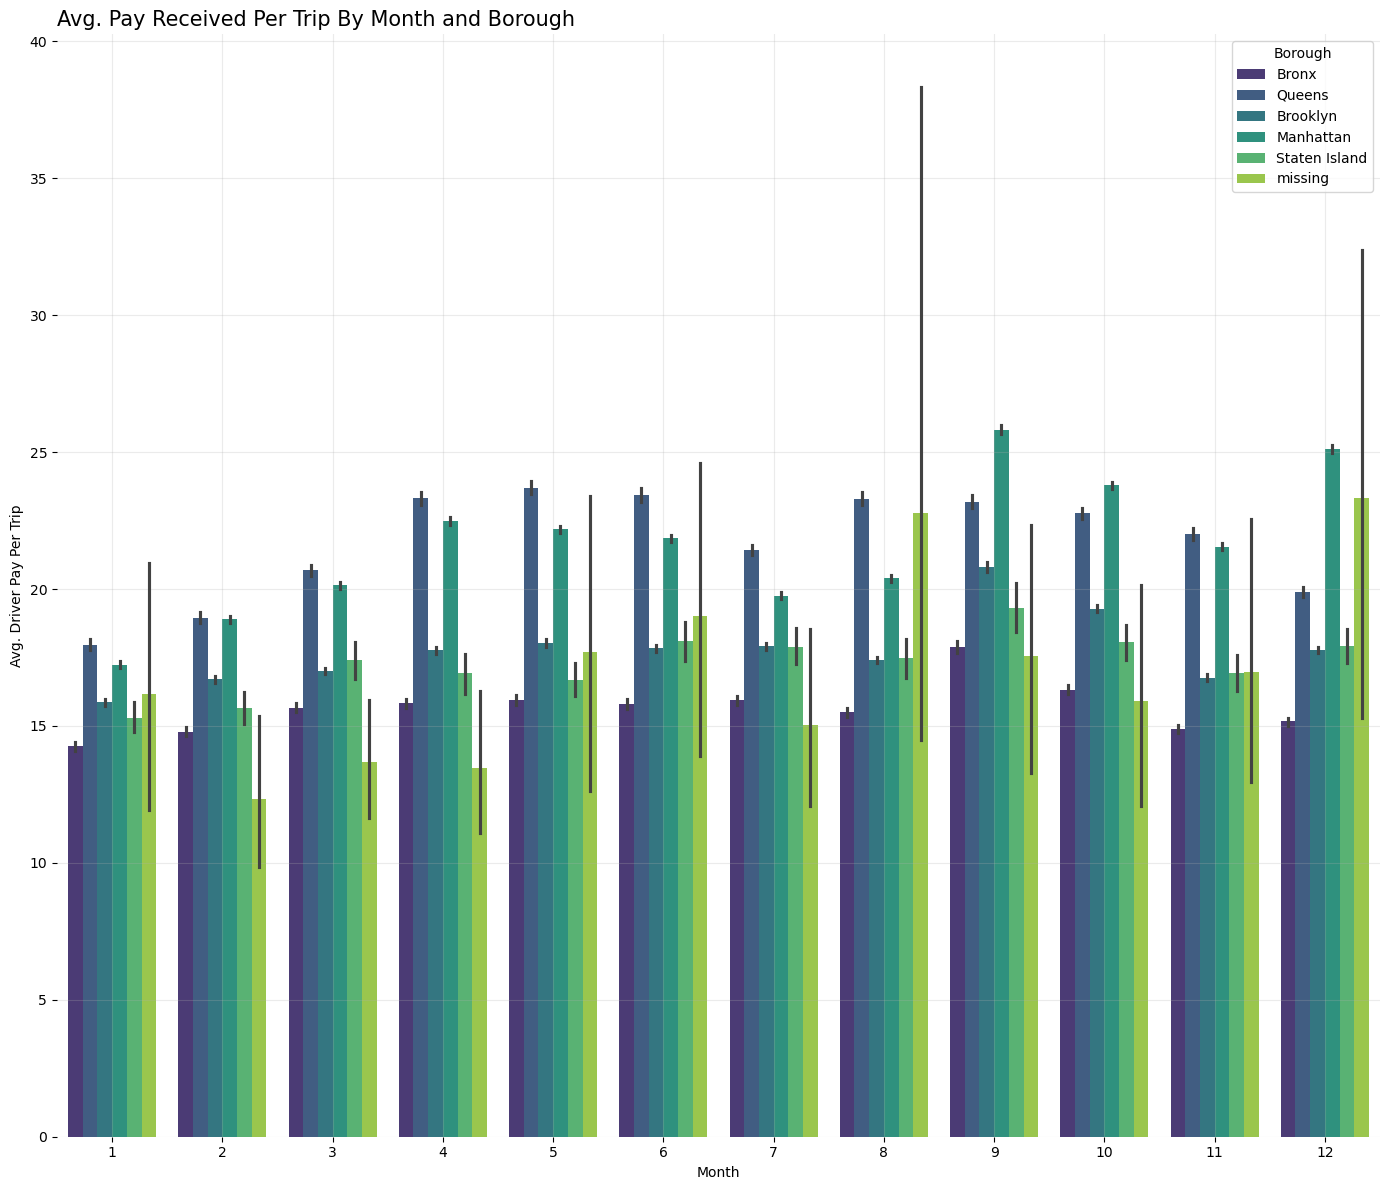

<Figure size 640x480 with 0 Axes>

In [96]:
#By Borough By Month

#Setting figure Size
plt.figure(figsize=(14,12))

#Setting color palette
sns.color_palette("viridis", as_cmap=True)

#Plotting
sns.barplot(data=df, x='month', y='driver_made', hue='borough_name', palette='viridis')

#Labeling
plt.ylabel("Avg. Driver Pay Per Trip")
plt.xlabel("Month")
plt.title("Avg. Pay Received Per Trip By Month and Borough", loc='left', fontsize=15)
plt.legend(title='Borough', loc ='upper right')

#Formatting
plt.grid(True, alpha=.25)
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show();

#plt.savefig('../images/avg_trip_pay_borough_month.png');

In [23]:
most_spend.mean()

18.50956238325951

/var/folders/1m/70vlnx9n73v__kwg38x_j79h0000gn/T/ipykernel_32832/402989572.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['borough_name'], y=df['driver_made'], palette="Spectral",


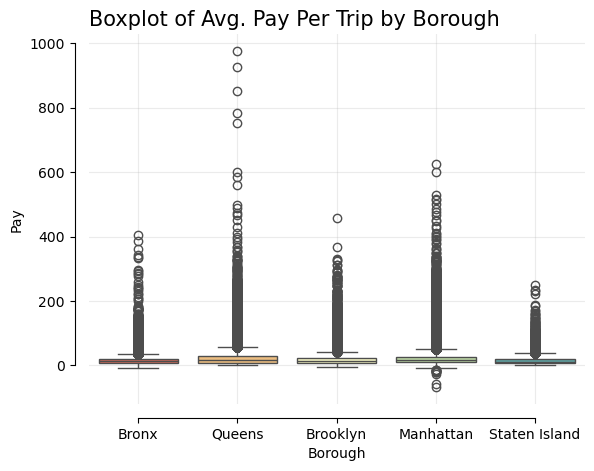

In [24]:
# Taking a look at outliers

#Plotting a boxplot of driver pay per trip, by borough
sns.boxplot(x=df['borough_name'], y=df['driver_made'], palette="Spectral",
            data=df)

#Labeling
#Labeling
plt.title("Boxplot of Avg. Pay Per Trip by Borough", loc='left', fontsize=15)
plt.xlabel('Borough')
plt.ylabel('Pay');

#Formatting
sns.despine(offset=10, trim=True)
plt.grid(True, alpha=.25)

/var/folders/1m/70vlnx9n73v__kwg38x_j79h0000gn/T/ipykernel_32832/509556322.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=no_outliers['borough_name'], y=no_outliers['driver_made'], palette="Spectral",


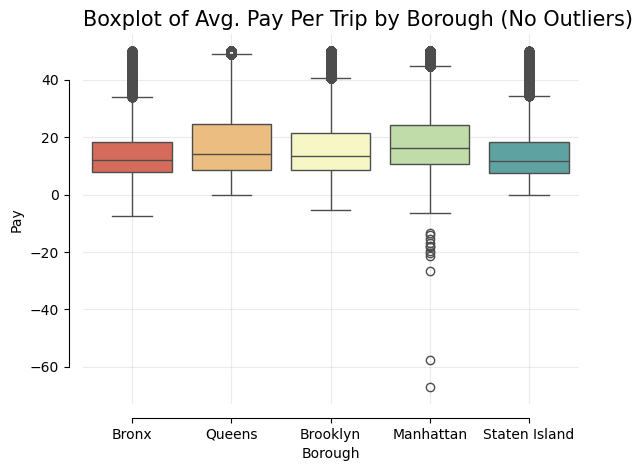

In [25]:
# So many outliers, let's only look at trips less than 50

#Sorting by trips less than $50
no_outliers = df[df['driver_made'] < 50.00]

#Turning it into a dataframe
no_outliers = pd.DataFrame(no_outliers)

#Plotting the new dataframe
sns.boxplot(x=no_outliers['borough_name'], y=no_outliers['driver_made'], palette="Spectral",
            data=no_outliers)

#Labeling
plt.title("Boxplot of Avg. Pay Per Trip by Borough (No Outliers)", loc='left', fontsize=15)
plt.xlabel('Borough')
plt.ylabel('Pay');

#Formatting
sns.despine(offset=10, trim=True)
plt.grid(True, alpha=.25)

In [26]:
#Turning negative numbers to positive since drivers don't pay the passenger
df['driver_made'] = df['driver_made'].abs()

/var/folders/1m/70vlnx9n73v__kwg38x_j79h0000gn/T/ipykernel_32832/424870071.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=outliers['borough_name'], y=outliers['driver_made'], palette="Spectral",


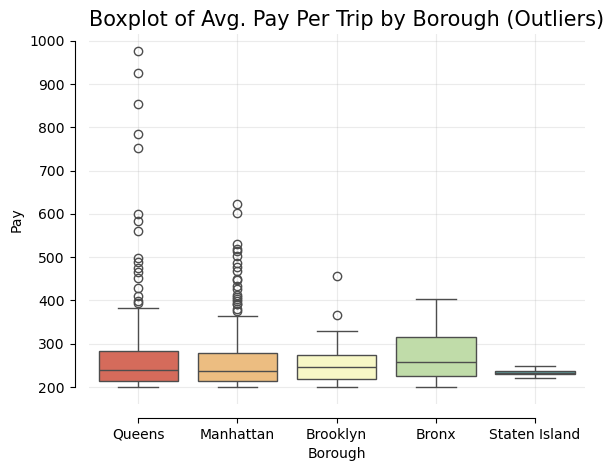

In [27]:
#Sorting by trips over $50
outliers = df[df['driver_made'] > 200.00]

#Turning it into a dataframe
outliers = pd.DataFrame(outliers)

#Plotting the new dataframe
sns.boxplot(x=outliers['borough_name'], y=outliers['driver_made'], palette="Spectral",
            data=outliers)

#Labeling
plt.title("Boxplot of Avg. Pay Per Trip by Borough (Outliers)", loc='left', fontsize=15)
plt.xlabel('Borough')
plt.ylabel('Pay');

#Formatting
sns.despine(offset=10, trim=True)
plt.grid(True, alpha=.25)

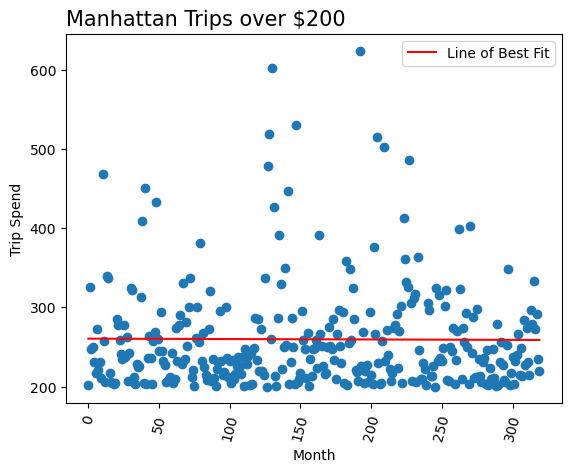

In [28]:
#Creating a subset to see the Manhattan clusters
man_out = outliers[outliers['borough_name'] == "Manhattan"]

#Creating a scatter plot of outlier trips by time in manhattan
plt.scatter(range(len(man_out)), y=man_out['driver_made']);

#Calculating the line of best fit
m, b = np.polyfit(x=range(len(man_out)), y=man_out['driver_made'], deg=1)

#Creating x values for the line
x_values = range(len(man_out))

#Generating y values for the line
y_values = m * x_values + b

#Plotting line
plt.plot(x_values, y_values, color='red', label='Line of Best Fit')

#Labeling
plt.title("Manhattan Trips over $200", loc='left', fontsize=15)
plt.xlabel("Month")
plt.ylabel("Trip Spend")
plt.legend();

#Formatting
plt.xticks(rotation=75);

## Histograms and Distributions

In [29]:
df.head()

,trip_miles,tips,congestion_surcharge,temp,preciptype,zone,borough_name,trip_duration,month,day_of_month,driver_made,day_of_week,hour,minute
req_index,,,,,,,,,,,,,,
2022-01-04,7.050,7.91,0.00,27.6,0,West Farms/Bronx River,Bronx,25.0,1,4,33.30,Tuesday,7,32
2022-01-04,2.470,0.00,0.00,27.6,0,South Ozone Park,Queens,11.0,1,4,8.33,Tuesday,7,24
2022-01-04,5.310,0.00,2.75,27.6,0,Steinway,Queens,23.0,1,4,18.08,Tuesday,7,24
2022-01-04,3.670,0.00,0.00,27.6,0,Starrett City,Brooklyn,19.0,1,4,17.34,Tuesday,7,24
2022-01-04,2.853,0.00,2.75,27.6,0,Yorkville West,Manhattan,8.0,1,4,7.57,Tuesday,7,24


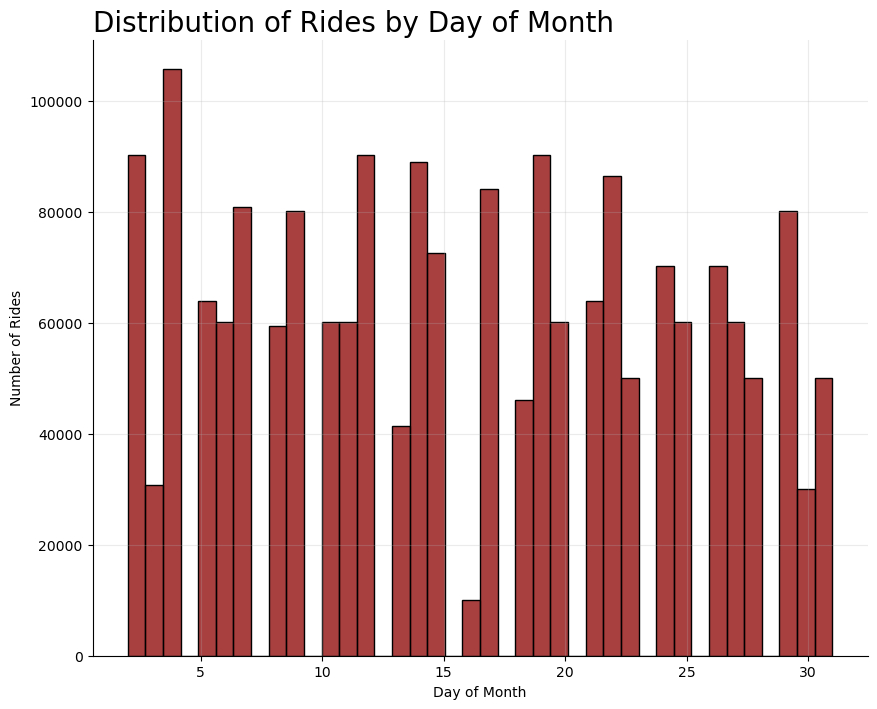

In [98]:
#Rides by Day of Month

#Creating figure size
plt.figure(figsize=(10,8))

#Plotting
sns.histplot(df['day_of_month'], color='darkred', bins=40);

#Labeling
plt.title('Distribution of Rides by Day of Month', loc='left', fontsize=20)
plt.xlabel("Day of Month")
plt.ylabel("Number of Rides");

#Formatting
plt.grid(True, alpha=.25)
sns.despine(right=True, top=True);

#plt.savefig('../images/dist_rides_by_dayofmonth.png');

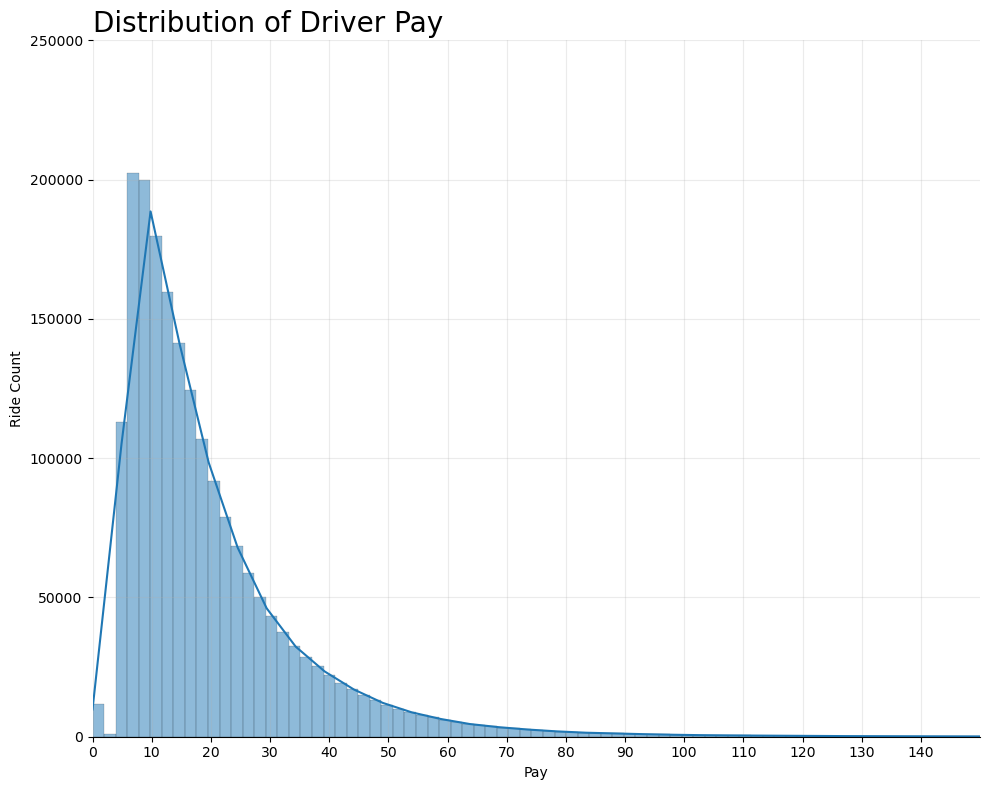

In [233]:
#Distribution of what driversgenerally make

#Creating figure size
plt.figure(figsize=(10, 8))

#PLotting
sns.histplot(df['driver_made'], bins=500, kde=True)

#Labeling
plt.title("Distribution of Driver Pay", loc='left', fontsize=20)
plt.xlabel("Pay")
plt.ylabel("Ride Count")

#Formatting
plt.xlim(0, 150)
plt.xticks(range(0, 150,10))
plt.ylim(0, 250000)
plt.grid(True, alpha=.25)
sns.despine(top=True, left=True)
plt.tight_layout();

#plt.savefig('../images/dist_driver_make_per_ride.png');

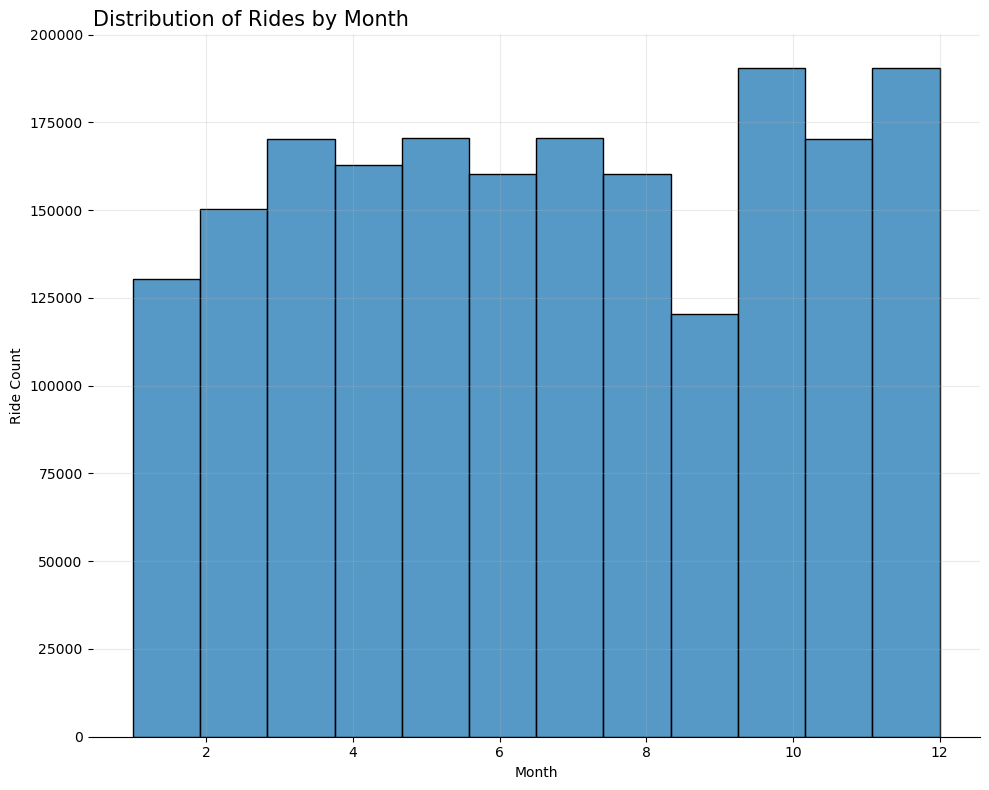

In [34]:
#Distribution of rides by month

#Creating figure size
plt.figure(figsize=(10, 8))

#PLotting
sns.histplot(df['month'], bins=12)

#Labeling
plt.title("Distribution of Rides by Month", loc='left', fontsize=15)
plt.xlabel("Month")
plt.ylabel("Ride Count")

#Formatting
plt.grid(True, alpha=.25)
sns.despine(top=True, left=True)
plt.tight_layout();

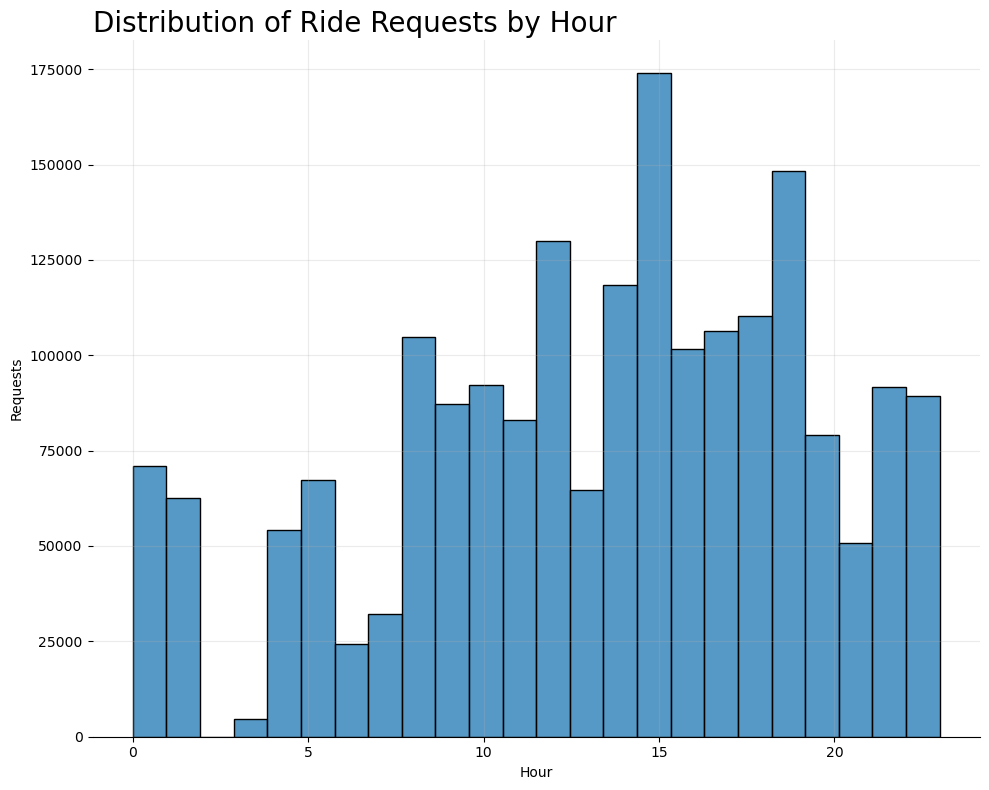

In [100]:
#Distribution of rides by hour

#Creating figure size
plt.figure(figsize=(10, 8))

#PLotting
sns.histplot(df['hour'], bins=24)

#Labeling
plt.title("Distribution of Ride Requests by Hour", loc='left', fontsize=20)
plt.xlabel("Hour")
plt.ylabel("Requests")

#Formatting
plt.grid(True, alpha=.25)
sns.despine(top=True, left=True)
plt.tight_layout();

#plt.savefig('../images/dist_rides_by_hour.png');

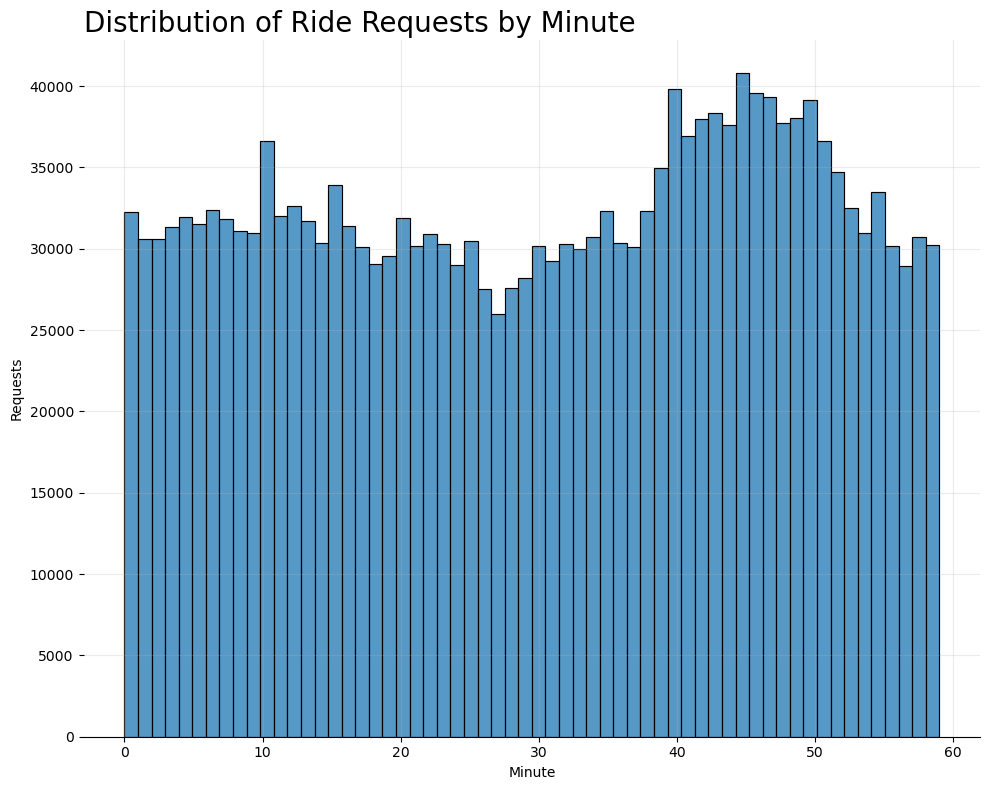

In [101]:
#Distribution of rides by minute

#Creating figure size
plt.figure(figsize=(10, 8))

#PLotting
sns.histplot(df['minute'], bins=60)

#Labeling
plt.title("Distribution of Ride Requests by Minute", loc='left', fontsize=20)
plt.xlabel("Minute")
plt.ylabel("Requests")

#Formatting
plt.grid(True, alpha=.25)
sns.despine(top=True, left=True)
plt.tight_layout();

#plt.savefig('../images/dist_rides_by_minute_of_hour.png');

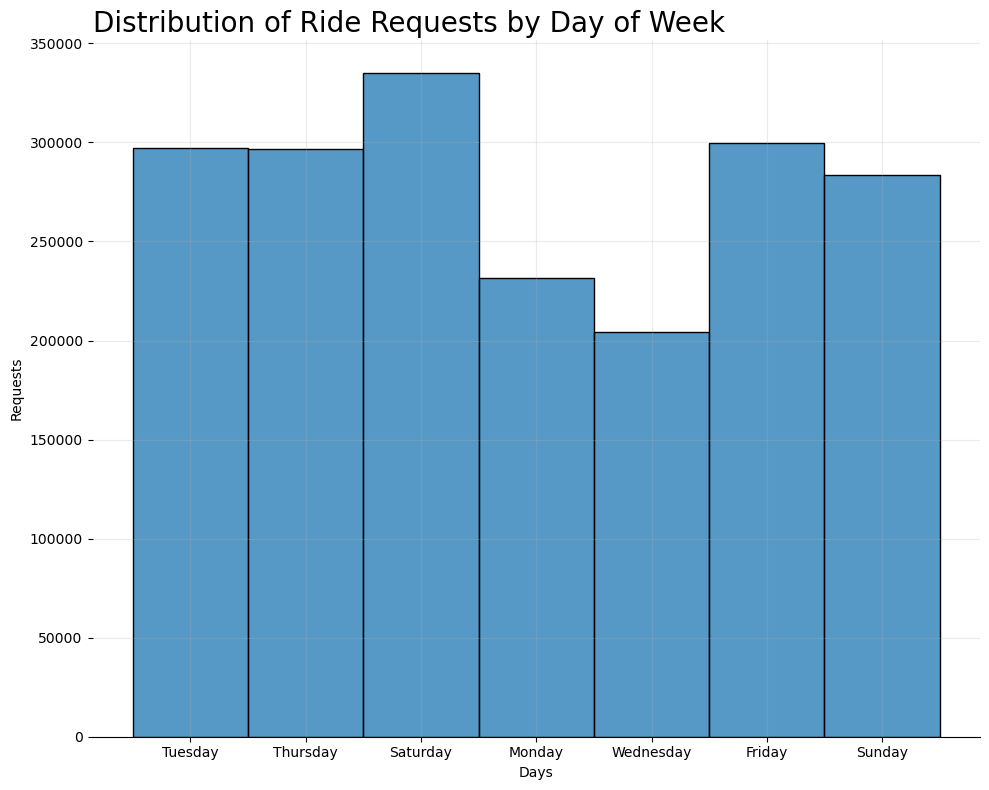

In [103]:
#Distribution of rides by day of the week

#Creating figure size
plt.figure(figsize=(10, 8))

#PLotting
sns.histplot(df['day_of_week'], bins=7)

#Labeling
plt.title("Distribution of Ride Requests by Day of Week", loc='left', fontsize=20)
plt.xlabel("Days")
plt.ylabel("Requests")

#Formatting
plt.grid(True, alpha=.25)
sns.despine(top=True, left=True)
plt.tight_layout();

#plt.savefig('../images/dist_rides_weekday.png');

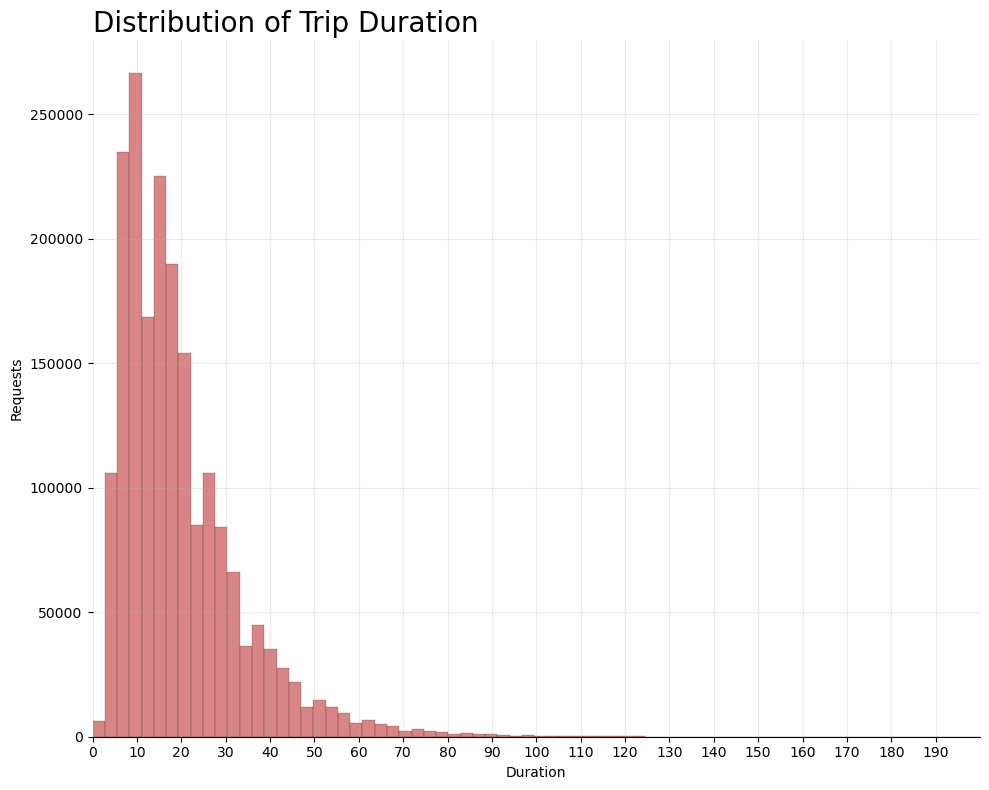

In [231]:
#Distribution of trip duration

#Creating figure size
plt.figure(figsize=(10, 8))

#Plotting
sns.histplot(df['trip_duration'], bins=400, color='indianred')

#Labeling
plt.title("Distribution of Trip Duration", loc='left', fontsize=20)
plt.xlabel("Duration")
plt.ylabel("Requests")

#Formatting
plt.xlim(0, 200)
plt.xticks(range(0, 200,10))
plt.grid(True, alpha=.25)
sns.despine(top=True, left=True)
plt.tight_layout();

#plt.savefig('../images/dist_trip_duration.png');

In [127]:
over_ten.shape

(42493, 14)

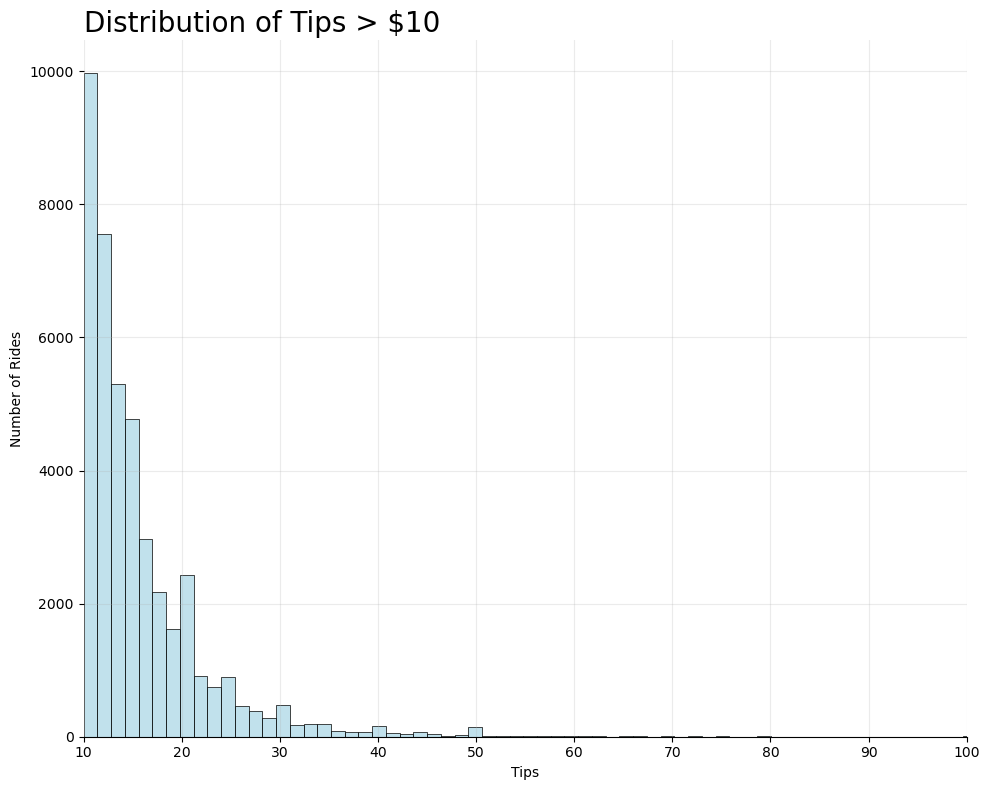

In [134]:
#Distribution of tips

#Creating figure size
plt.figure(figsize=(10, 8))

#Creating a df of tips over $10
over_ten = df[df['tips'] > 10]
over_ten = pd.DataFrame(over_ten)

#Plotting
sns.histplot(over_ten['tips'], bins=100, color='lightblue')

#Labeling
plt.title("Distribution of Tips > $10", loc='left', fontsize=20)
plt.xlabel("Tips")
plt.ylabel("Number of Rides")

#Formatting
plt.xlim(10, 100)
plt.grid(True, alpha=.25)
sns.despine(top=True, left=True)
plt.tight_layout();

#plt.savefig('../images/dist_tips_over10.png');

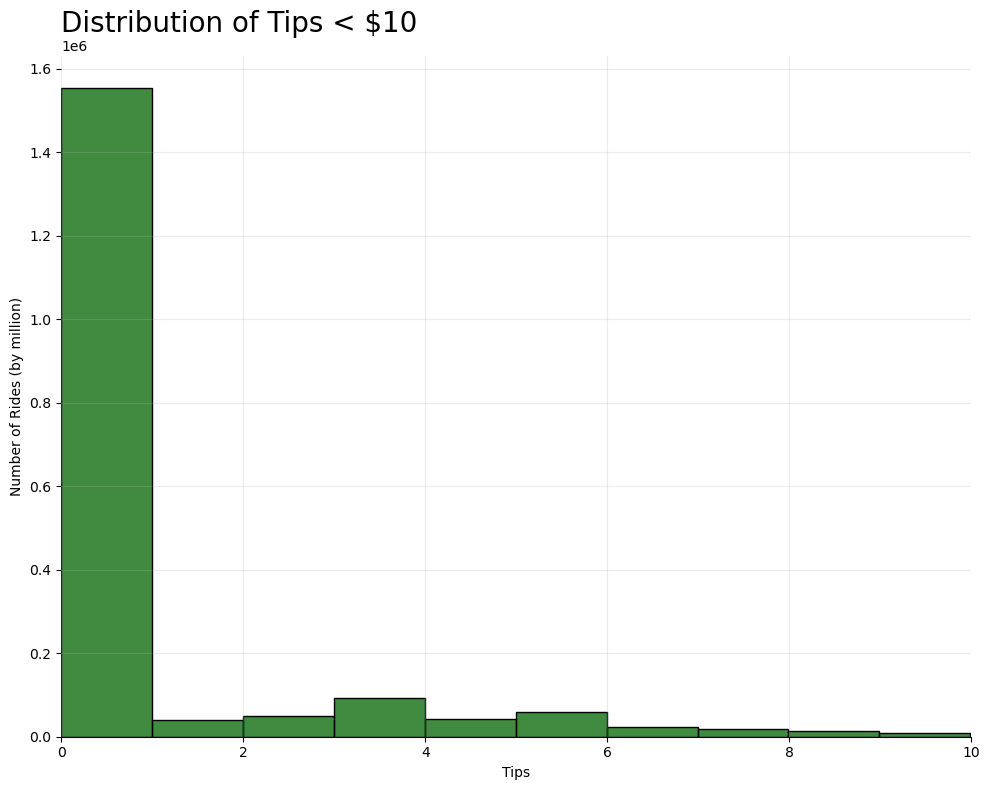

In [133]:
#Distribution of tips

#Creating figure size
plt.figure(figsize=(10, 8))

#Creating a df of tips under $10
under_ten = df[df['tips'] < 10]
under_ten = pd.DataFrame(under_ten)

#Plotting
sns.histplot(under_ten['tips'], bins=10, color='darkgreen')

#Labeling
plt.title("Distribution of Tips < $10", loc='left', fontsize=20)
plt.xlabel("Tips")
plt.ylabel("Number of Rides (by million)")

#Formatting
plt.xlim(0, 10)
plt.ylim(0, )
plt.grid(True, alpha=.25)
sns.despine(top=True, left=True)
plt.tight_layout();

#plt.savefig('../images/dist_tips_unde10.png');

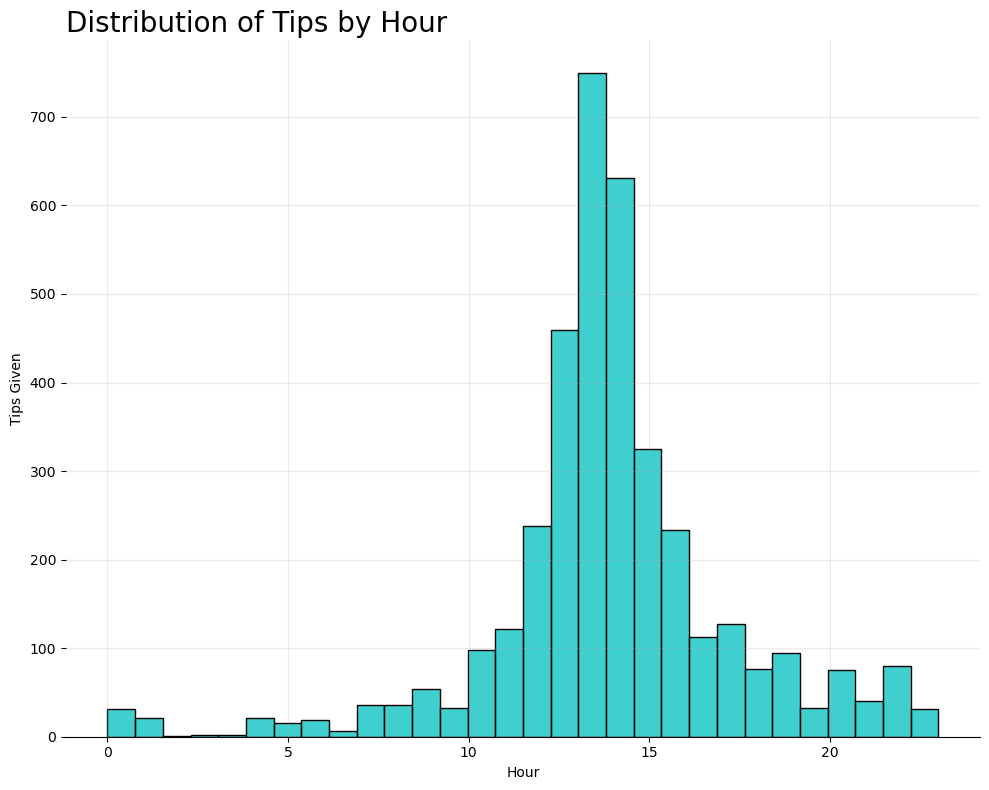

In [192]:
#Distribution of tips by hour

#Grouping hour by tips
hour_tips = df['hour'].groupby(df['tips']).mean()

#Creating figure size
plt.figure(figsize=(10, 8))

#PLotting
sns.histplot(hour_tips, bins=30, color='c')

#Labeling
plt.title("Distribution of Tips by Hour", loc='left', fontsize=20)
plt.xlabel("Hour")
plt.ylabel("Tips Given")

#Formatting
plt.grid(True, alpha=.25)
sns.despine(top=True, left=True)
plt.tight_layout();

plt.savefig('../images/dist_tips_by_hour.png');

In [224]:
df.head()

,trip_miles,tips,congestion_surcharge,temp,preciptype,zone,borough_name,trip_duration,month,day_of_month,driver_made,day_of_week,hour,minute
req_index,,,,,,,,,,,,,,
2022-01-04,7.050,7.91,0.00,27.6,0,West Farms/Bronx River,Bronx,25.0,1,4,33.30,Tuesday,7,32
2022-01-04,2.470,0.00,0.00,27.6,0,South Ozone Park,Queens,11.0,1,4,8.33,Tuesday,7,24
2022-01-04,5.310,0.00,2.75,27.6,0,Steinway,Queens,23.0,1,4,18.08,Tuesday,7,24
2022-01-04,3.670,0.00,0.00,27.6,0,Starrett City,Brooklyn,19.0,1,4,17.34,Tuesday,7,24
2022-01-04,2.853,0.00,2.75,27.6,0,Yorkville West,Manhattan,8.0,1,4,7.57,Tuesday,7,24


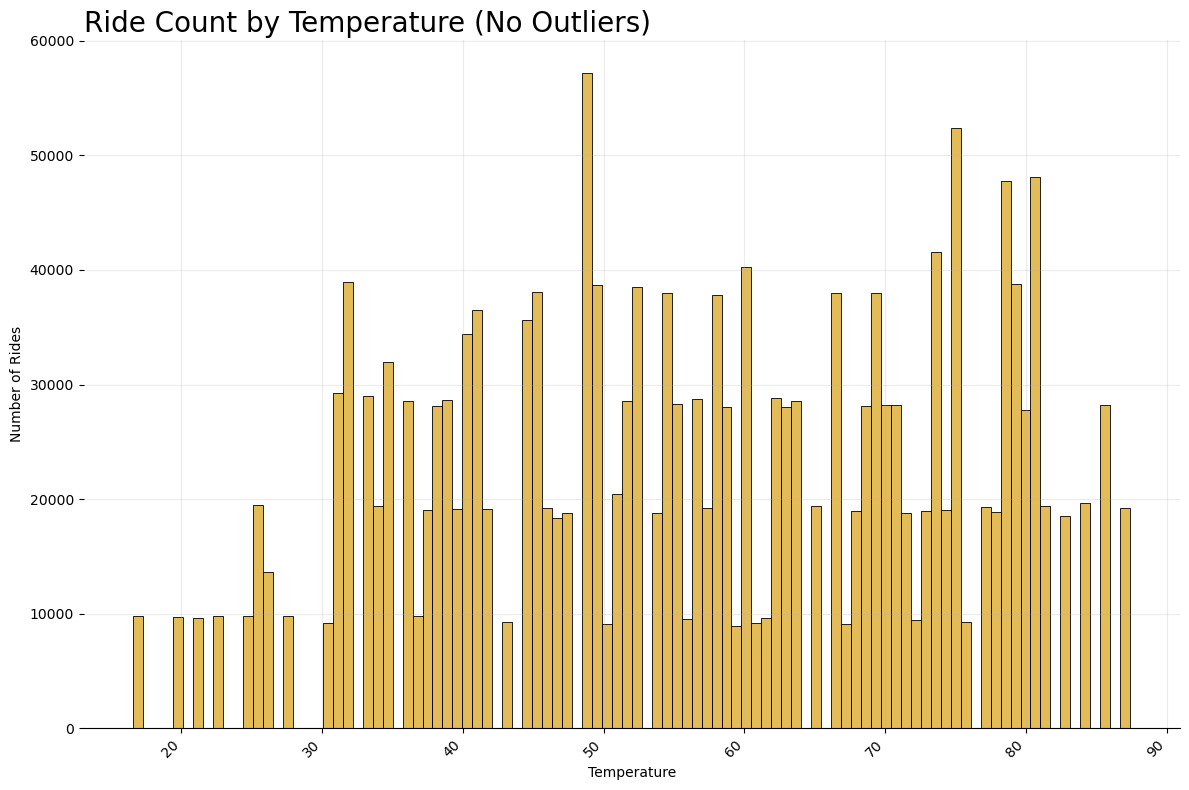

In [105]:
#Setting figure size
plt.figure(figsize=(12,8))

#Plotting the graph
sns.histplot(no_outliers['temp'], bins=100, color='goldenrod')


#Labeling
plt.ylabel("Number of Rides")
plt.xlabel("Temperature")
plt.title("Ride Count by Temperature (No Outliers)", loc='left', fontsize=20);

#Formatting
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=.25)
sns.despine(top=True, left=True)
plt.tight_layout(); 

#plt.savefig('../images/dist_rides_by_temp.png');

## Looking for Correlation

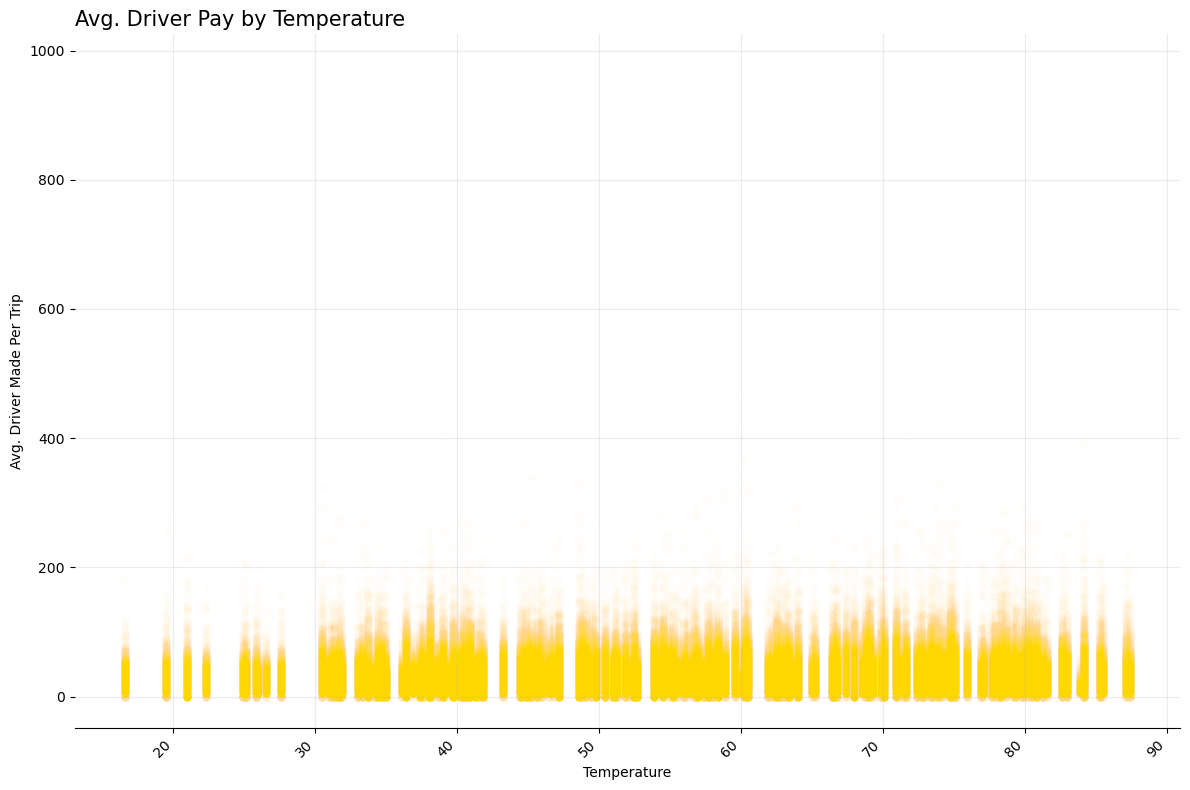

In [69]:
#Setting figure size
plt.figure(figsize=(12,8))

#Plotting the graph
sns.scatterplot(data=df, x=df['temp'], y=df['driver_made'], marker='o', color='gold', alpha=.01)

#Labeling
plt.ylabel("Avg. Driver Made Per Trip")
plt.xlabel("Temperature")
plt.title("Avg. Driver Pay by Temperature", loc='left', fontsize=20);

#Formatting
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=.25)
sns.despine(top=True, left=True)
plt.tight_layout(); 

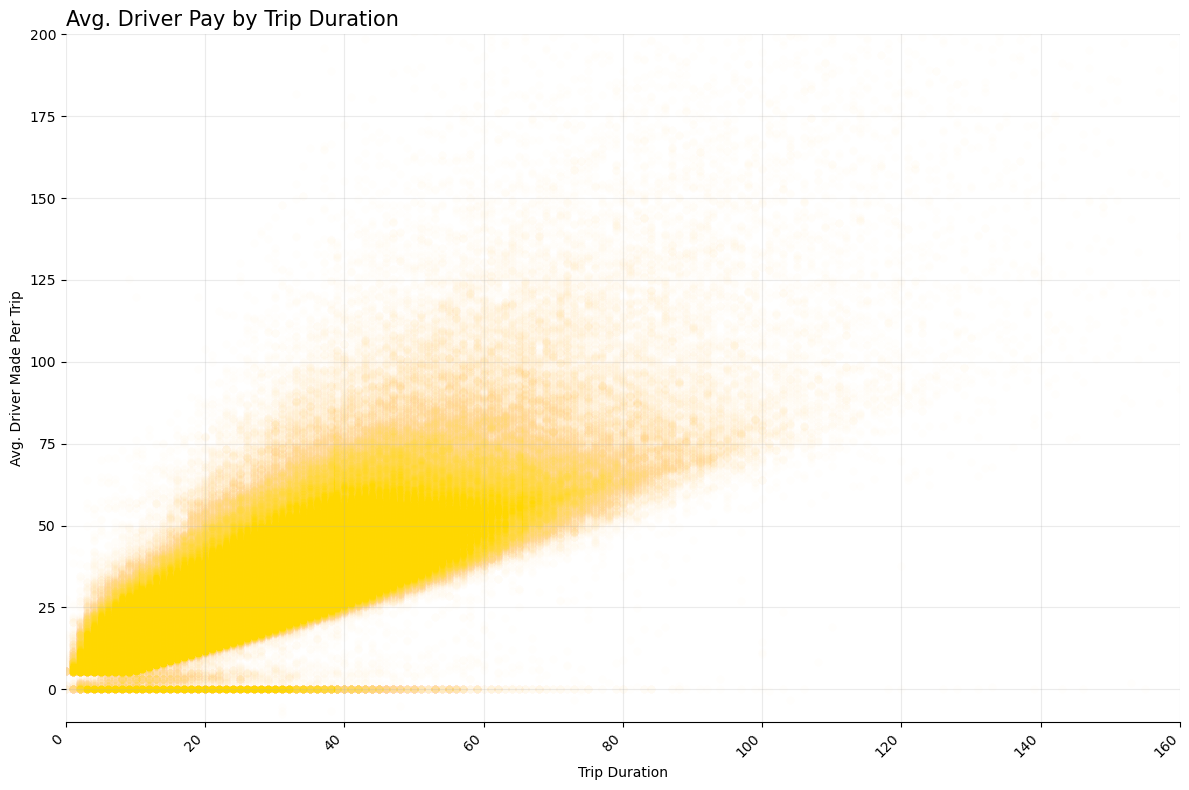

In [161]:
#Setting figure size
plt.figure(figsize=(12,8))

#Plotting the graph
sns.scatterplot(data=df, x=df['trip_duration'], y=df['driver_made'], marker='o', color='gold', alpha=.01)

#Labeling
plt.ylabel("Avg. Driver Made Per Trip")
plt.xlabel("Trip Duration")
plt.title("Avg. Driver Pay by Trip Duration", loc='left', fontsize=15);

#Formatting
plt.xlim(0, 160)
plt.ylim(-10, 200)
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=.25)
sns.despine(top=True, left=True)
plt.tight_layout();

#plt.savefig('../images/driver_pay_per_trip_by_duration.png');

In [163]:
#Discovered drivers who made negative amounts on their trip, which makes no sense

#Going back to cleaning to fix these as they must be typos

/var/folders/1m/70vlnx9n73v__kwg38x_j79h0000gn/T/ipykernel_32832/1362945313.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=borough_count.index, y=borough_count.values, palette='dark:Blue')


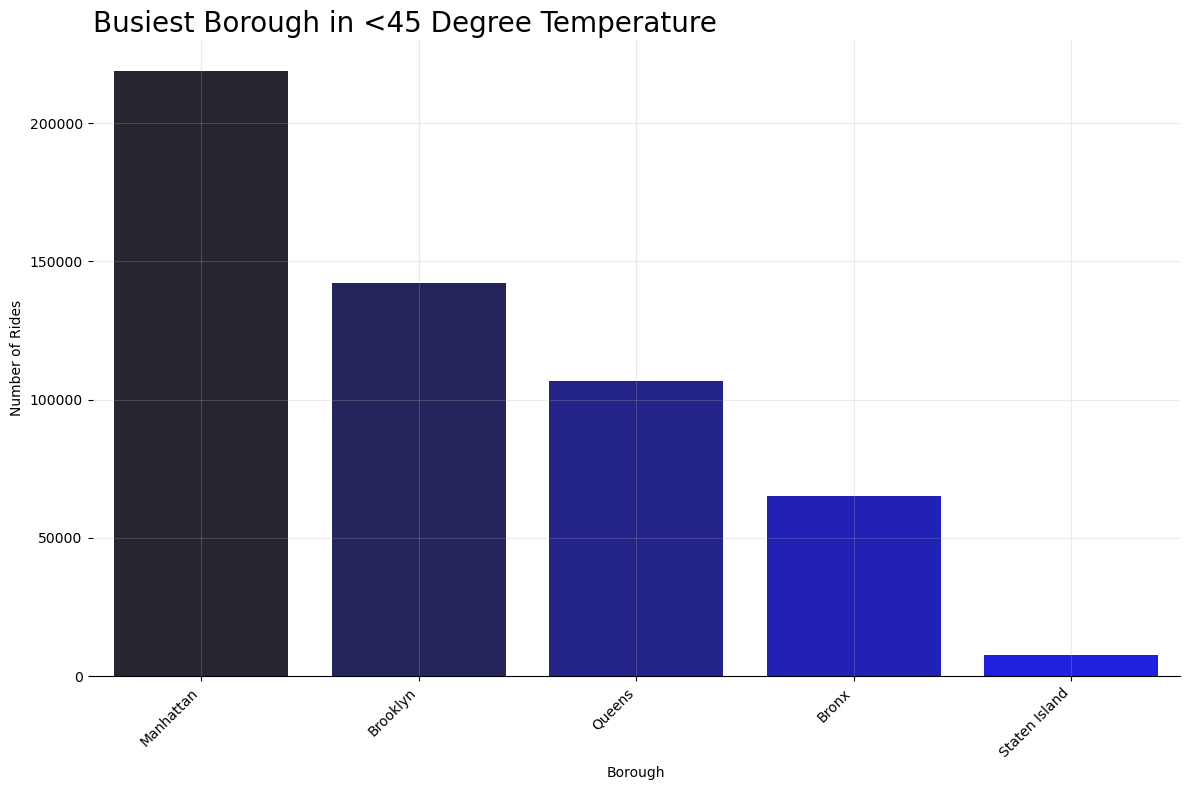

In [107]:
#Setting figure size
plt.figure(figsize=(12,8))

#Creating df of busiest borough in the cold
cold_temp = df[(df['temp'] < 45) & (df['borough_name'] != 'missing')]
cold_temp = pd.DataFrame(cold_temp)

#Creating counts of buroughs
borough_count = cold_temp['borough_name'].value_counts()

#Plotting the graph
sns.color_palette("dark:Blue", as_cmap=True)
sns.barplot(x=borough_count.index, y=borough_count.values, palette='dark:Blue')

#Labeling
plt.ylabel("Number of Rides")
plt.xlabel("Borough")
plt.title("Busiest Borough in <45 Degree Temperature", loc='left', fontsize=20);

#Formatting
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=.25)
sns.despine(top=True, left=True)
plt.tight_layout();

#plt.savefig('../images/busiest_borough_when_cold.png');

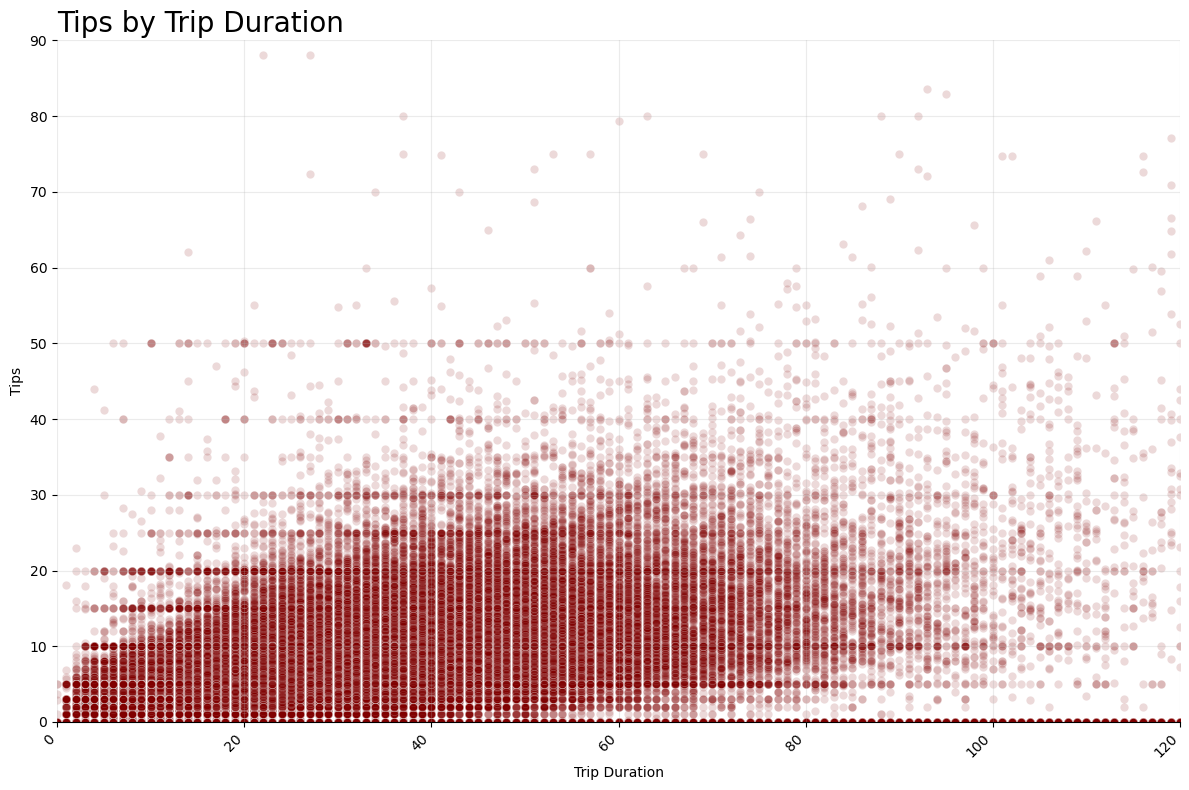

In [142]:
#Setting figure size
plt.figure(figsize=(12,8))

#Plotting the graph
sns.scatterplot(data=df, x=df['trip_duration'], y=df['tips'], marker='o', color='maroon', alpha=.15)

#Labeling
plt.ylabel("Tips")
plt.xlabel("Trip Duration")
plt.title("Tips by Trip Duration", loc='left', fontsize=20);

#Formatting
plt.xlim(0, 120)
plt.ylim(0, 90)
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=.25)
sns.despine(top=True, left=True)
plt.tight_layout(); 

#plt.savefig('../images/corr_tips_tripduration.png');

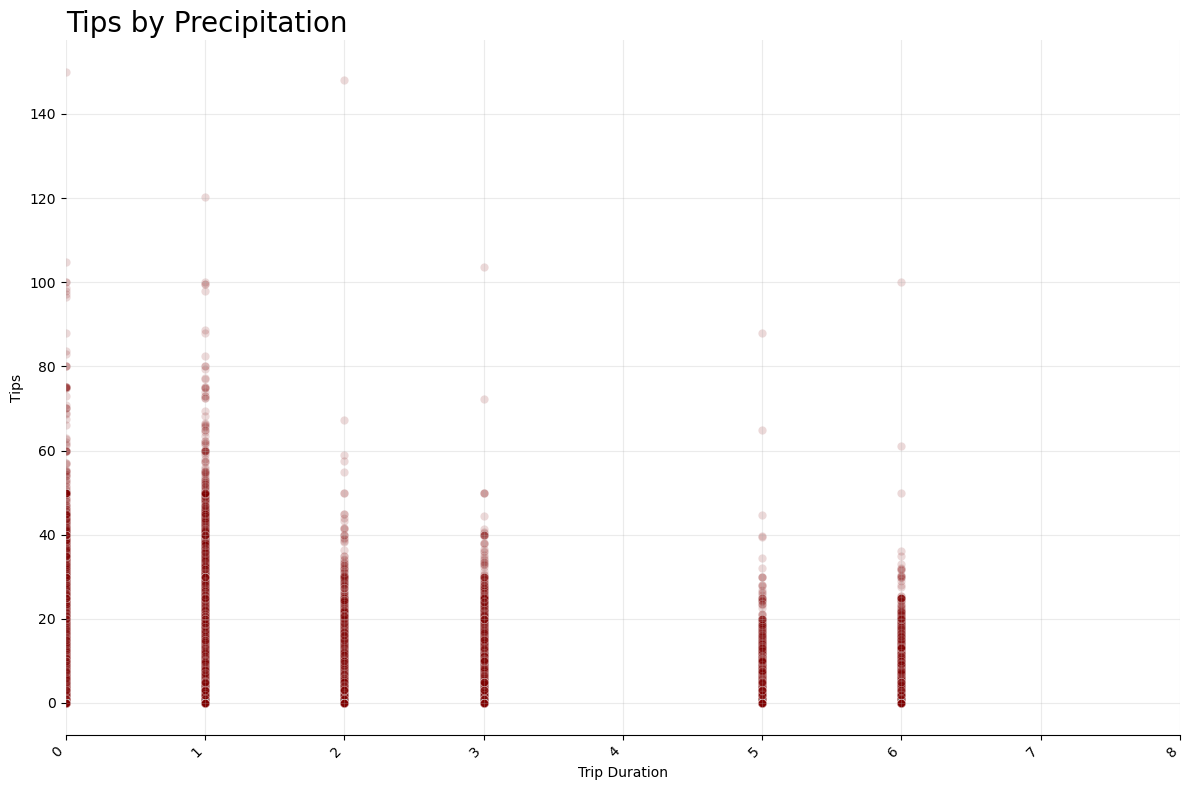

In [197]:
#Setting figure size
plt.figure(figsize=(12,8))

#Plotting the graph
sns.scatterplot(data=df, x=df['preciptype'], y=df['tips'], marker='o', color='maroon', alpha=.15)

#Labeling
plt.ylabel("Tips")
plt.xlabel("Trip Duration")
plt.title("Tips by Precipitation", loc='left', fontsize=20);

#Formatting
plt.xlim(0, 8)
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=.25)
sns.despine(top=True, left=True)
plt.tight_layout(); 

#plt.savefig('../images/corr_tips_precip.png');

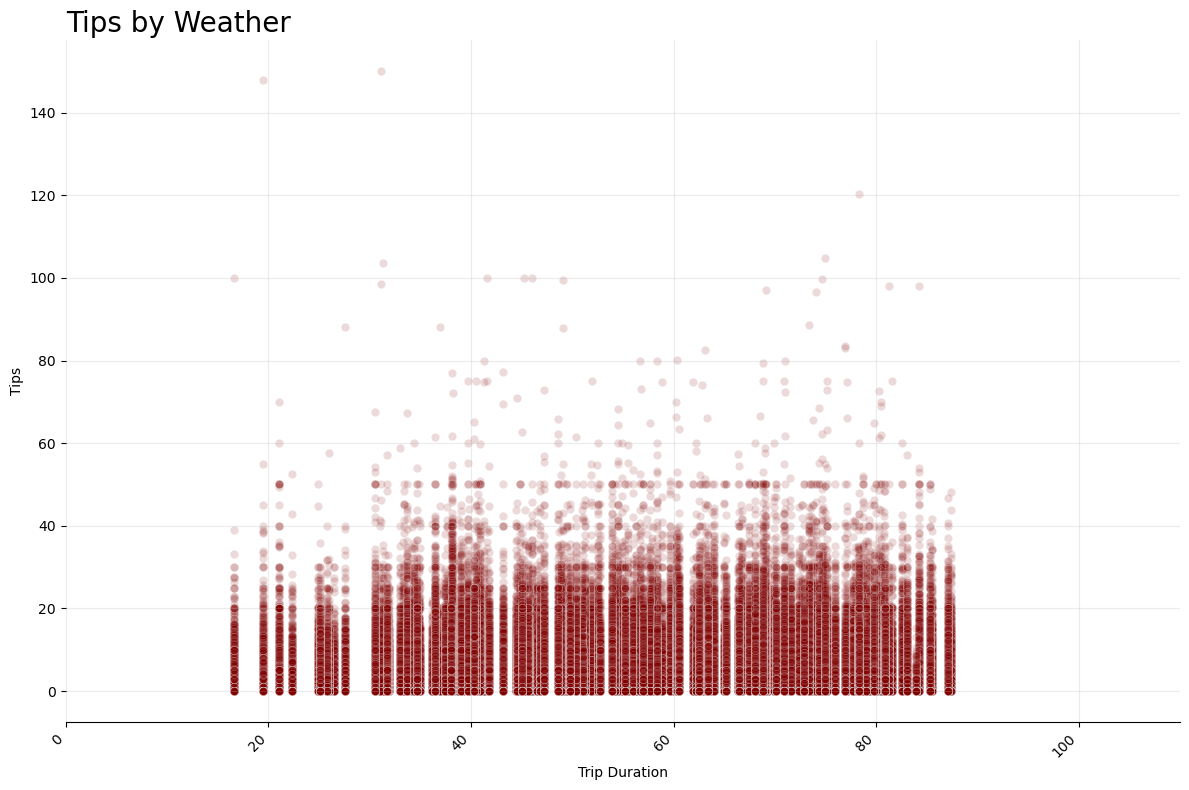

In [198]:
#Setting figure size
plt.figure(figsize=(12,8))

#Plotting the graph
sns.scatterplot(data=df, x=df['temp'], y=df['tips'], marker='o', color='maroon', alpha=.15)

#Labeling
plt.ylabel("Tips")
plt.xlabel("Trip Duration")
plt.title("Tips by Weather", loc='left', fontsize=20);

#Formatting
plt.xlim(0, 110)
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=.25)
sns.despine(top=True, left=True)
plt.tight_layout(); 

#plt.savefig('../images/corr_tips_weather.png');

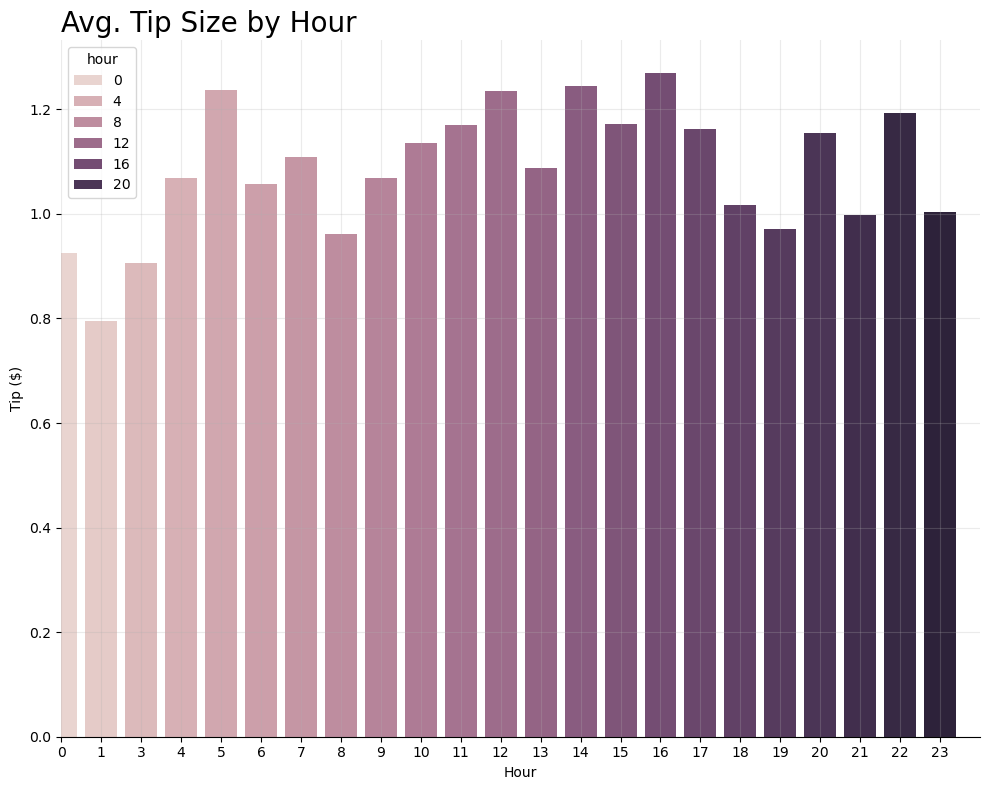

In [200]:
#Avg. Tips by Hour

#Grouping hour by tips
avg_tips_hour = df.groupby('hour')['tips'].mean()
avg_tips_hour = pd.DataFrame(avg_tips_hour)
avg_tips_hour = avg_tips_hour.reset_index()

#Creating figure size
plt.figure(figsize=(10, 8))

#Plotting
sns.barplot(data=avg_tips_hour, x=avg_tips_hour['hour'], y=avg_tips_hour['tips'], hue='hour')

#Labeling
plt.title("Avg. Tip Size by Hour", loc='left', fontsize=20)
plt.xlabel("Hour")
plt.ylabel("Tip ($)");

#Formatting
plt.xlim(0, 23)
plt.grid(True, alpha=.25)
sns.despine(top=True, left=True)
plt.tight_layout();

#plt.savefig('../images/avg_tip_by_hour.png');

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


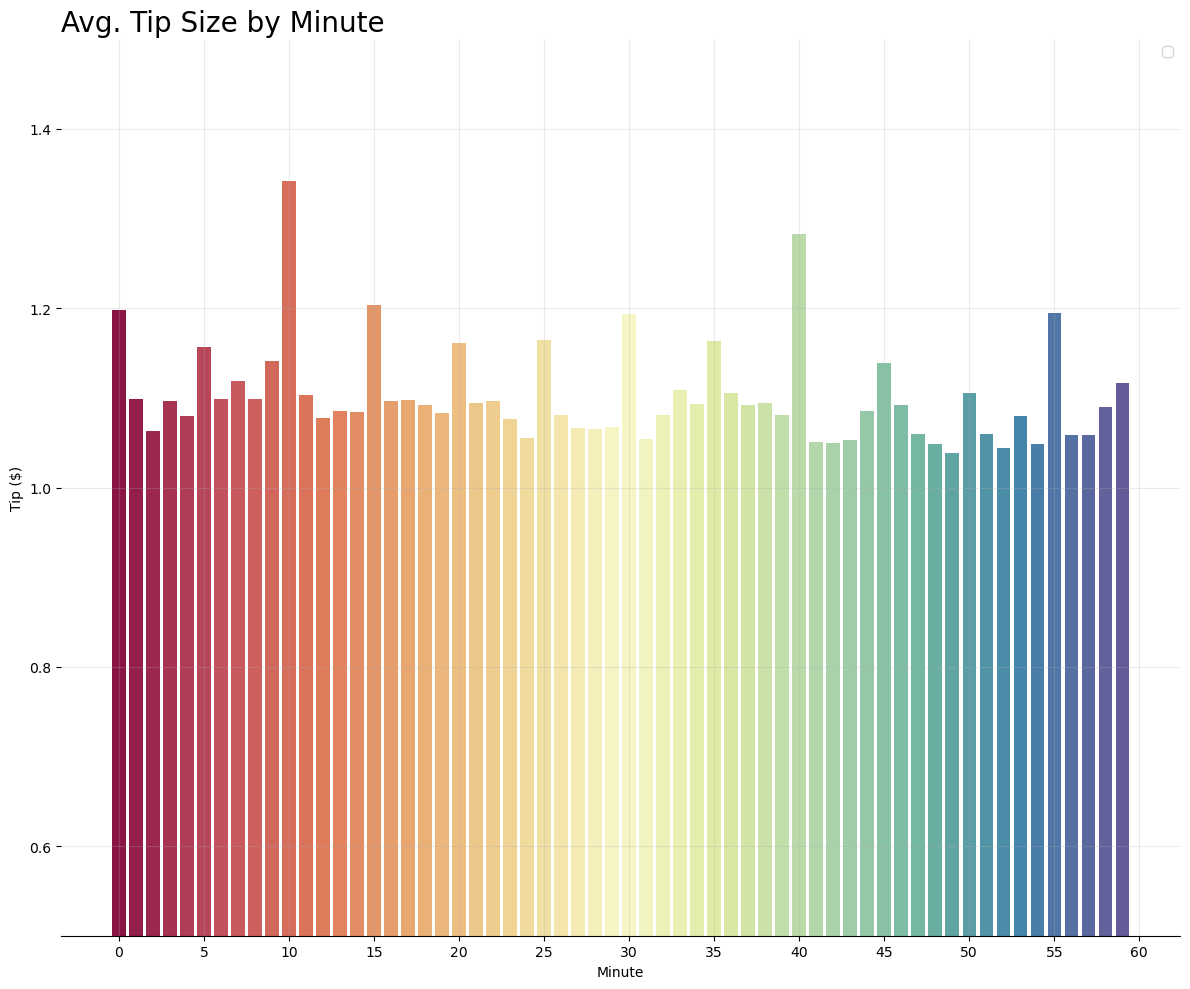

In [222]:
#Avg. Tips by Minute

#Grouping hour by tips
avg_tips_min = df.groupby('minute')['tips'].mean()
avg_tips_min = pd.DataFrame(avg_tips_min)
avg_tips_min = avg_tips_min.reset_index()

#Creating figure size
plt.figure(figsize=(12, 10))

#Creating palette
sns.color_palette("Spectral", as_cmap=True)

#Plotting
sns.barplot(data=avg_tips_min, x=avg_tips_min['minute'], y=avg_tips_min['tips'], palette='Spectral', hue='minute', native_scale=True)

#Labeling
plt.title("Avg. Tip Size by Minute", loc='left', fontsize=20)
plt.xlabel("Minute")
plt.ylabel("Tip ($)");

#Formatting
plt.grid(True, alpha=.25)
plt.ylim(.5, 1.5)
plt.xticks(range(0, 61, 5))
sns.despine(top=True, left=True)
plt.legend(loc='upper right')
plt.tight_layout();

plt.savefig('../images/avg_tip_by_min.png');